In [2]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = 'C://Users/sruja/Desktop/Ashwin/Unemployment in India.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


/////////////////////////////////////////////  Exploratory data analysis  /////////////////////////////////////////////////////

In [4]:
df.shape

(768, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


We observe that there are no null values

In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


/////////////////////////////////////////////////////// Data Transformation ////////////////////////////////////////////////////////////////////

In [7]:
# Changing the datatype of date column to datetime
df['Date'] = pd.to_datetime(df[' Date'])

#Drop the unnecessary date column (the one which is not of the type datetime)
df.drop(' Date', axis=1, inplace=True)

# Drop Freuency column
df.drop(" Frequency", axis=1, inplace=True)

#Removing the leading spaces from the col names
df.columns = df.columns.str.strip()

# Display the updated DataFrame with the new 'year' column
df.head()


C:\Users\sruja\AppData\Local\Temp\ipykernel_14536\2026514552.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df[' Date'])


,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date
0,Andhra Pradesh,3.65,11999139.0,43.24,Rural,2019-05-31
1,Andhra Pradesh,3.05,11755881.0,42.05,Rural,2019-06-30
2,Andhra Pradesh,3.75,12086707.0,43.50,Rural,2019-07-31
3,Andhra Pradesh,3.32,12285693.0,43.97,Rural,2019-08-31
4,Andhra Pradesh,5.17,12256762.0,44.68,Rural,2019-09-30


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column 'year' containing only the year
df['year'] = df['Date'].dt.year
df.head()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,year
0,Andhra Pradesh,3.65,11999139.0,43.24,Rural,2019-05-31,2019.0
1,Andhra Pradesh,3.05,11755881.0,42.05,Rural,2019-06-30,2019.0
2,Andhra Pradesh,3.75,12086707.0,43.50,Rural,2019-07-31,2019.0
3,Andhra Pradesh,3.32,12285693.0,43.97,Rural,2019-08-31,2019.0
4,Andhra Pradesh,5.17,12256762.0,44.68,Rural,2019-09-30,2019.0


In [9]:
# Remove decimal degits from year
df['year'] = df['year'].fillna(0).astype(int)
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)
df.head()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,year
0,Andhra Pradesh,3.65,11999139.0,43.24,Rural,2019-05-31,2019
1,Andhra Pradesh,3.05,11755881.0,42.05,Rural,2019-06-30,2019
2,Andhra Pradesh,3.75,12086707.0,43.50,Rural,2019-07-31,2019
3,Andhra Pradesh,3.32,12285693.0,43.97,Rural,2019-08-31,2019
4,Andhra Pradesh,5.17,12256762.0,44.68,Rural,2019-09-30,2019


In [10]:
df_2019 = df[df['year'] == 2019]
df_2019 = df[df['year'] == 2019].reset_index(drop=True)
df_2019.head()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,year
0,Andhra Pradesh,3.65,11999139.0,43.24,Rural,2019-05-31,2019
1,Andhra Pradesh,3.05,11755881.0,42.05,Rural,2019-06-30,2019
2,Andhra Pradesh,3.75,12086707.0,43.50,Rural,2019-07-31,2019
3,Andhra Pradesh,3.32,12285693.0,43.97,Rural,2019-08-31,2019
4,Andhra Pradesh,5.17,12256762.0,44.68,Rural,2019-09-30,2019


In [11]:
df_2020 = df[df['year'] == 2020]
df_2020 = df[df['year'] == 2020].reset_index(drop=True)
df_2020.head()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,year
0,Andhra Pradesh,4.84,12016676.0,43.46,Rural,2020-01-31,2020
1,Andhra Pradesh,5.91,11723617.0,42.83,Rural,2020-02-29,2020
2,Andhra Pradesh,4.06,11359660.0,40.66,Rural,2020-03-31,2020
3,Andhra Pradesh,16.29,8792827.0,36.03,Rural,2020-04-30,2020
4,Andhra Pradesh,14.46,9526902.0,38.16,Rural,2020-05-31,2020


///////////////////////////////////////////////////////////  Analysis  /////////////////////////////////////////////////////////////////////////

List of states and their avg Unemployment Rate (%)

In [12]:
avg_unemployment_by_region = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
print(avg_unemployment_by_region)


Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name: Estimated Unemployment Rate (%), dtype: float64


Top 5 states with highest average Unemployment Rate (%)

In [13]:
#Top 5 states with highest average Unemployment Rate (%)

top5_regions = avg_unemployment_by_region.nlargest(5)
print(top5_regions)

Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Name: Estimated Unemployment Rate (%), dtype: float64


Top 5 states with least average Unemployment Rate (%)

In [14]:
# Top 5 states with least average Estimated Unemployment Rate (%)
bottom5_regions = avg_unemployment_by_region.nsmallest(5)
print(bottom5_regions)

Region
Meghalaya      4.798889
Odisha         5.657857
Assam          6.428077
Uttarakhand    6.582963
Gujarat        6.663929
Name: Estimated Unemployment Rate (%), dtype: float64


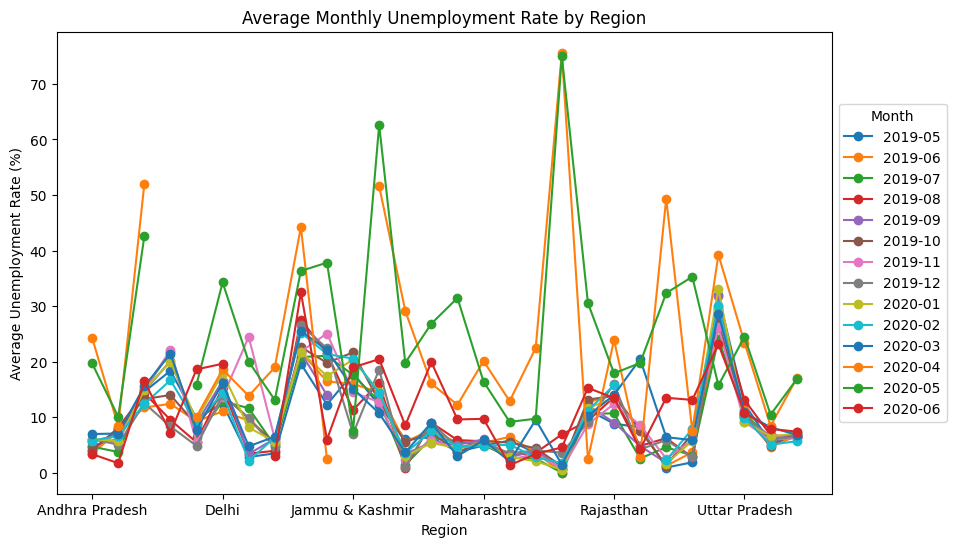

In [27]:
# Aggregate data by month and region
monthly_aggregated = df.groupby(['Region', df['Date'].dt.to_period("M")])['Estimated Unemployment Rate (%)'].mean().unstack()

# Plot aggregated trends
monthly_aggregated.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Monthly Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.legend(title='Month', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


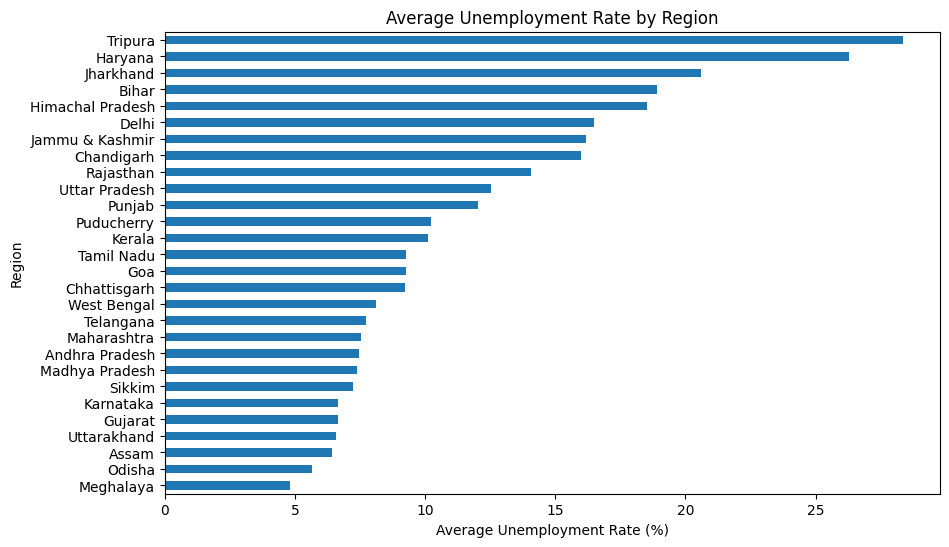

In [20]:
# Calculate average unemployment rate per region
average_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

# Plot overall regional comparison
average_unemployment.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()


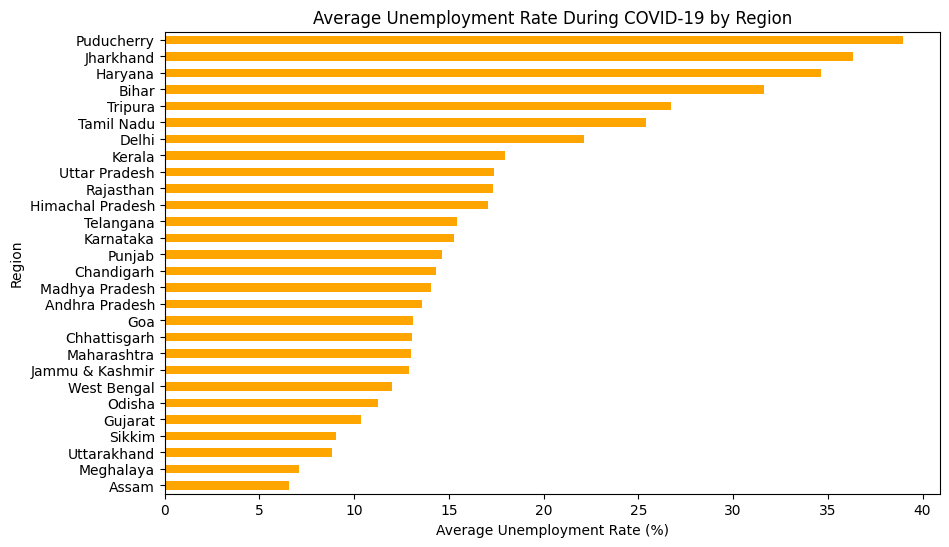

In [21]:
# Filter data for the COVID-19 period
covid_data = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-06-30')]

# Calculate average unemployment rate during COVID-19 per region
average_unemployment_covid = covid_data.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

# Plot the impact of COVID-19 on average unemployment rate
average_unemployment_covid.sort_values().plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Average Unemployment Rate During COVID-19 by Region')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()
